In [1]:
import torch
import transformers

import torchtrail

/Users/arakhmati/github/torchtrail/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "google/vit-base-patch16-224"
config = transformers.ViTConfig.from_pretrained(model_name)

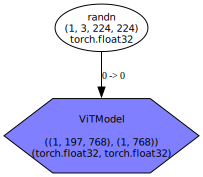

In [3]:
batch_size = 1
num_channels = 3
height = 224
width = 224

config = transformers.ViTConfig.from_pretrained(model_name)
model = transformers.models.vit.modeling_vit.ViTModel(config).eval()

with torchtrail.trace():
    input_tensor = torch.randn(batch_size, num_channels, height, width)
    output = model(input_tensor).pooler_output
        
torchtrail.visualize(output, max_depth=1)

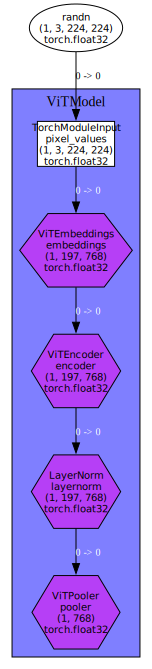

In [4]:
torchtrail.visualize(output, max_depth=2)

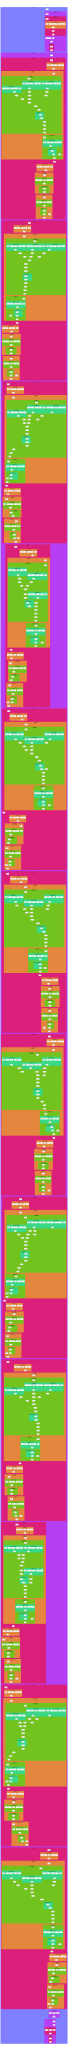

In [5]:

torchtrail.visualize(output)

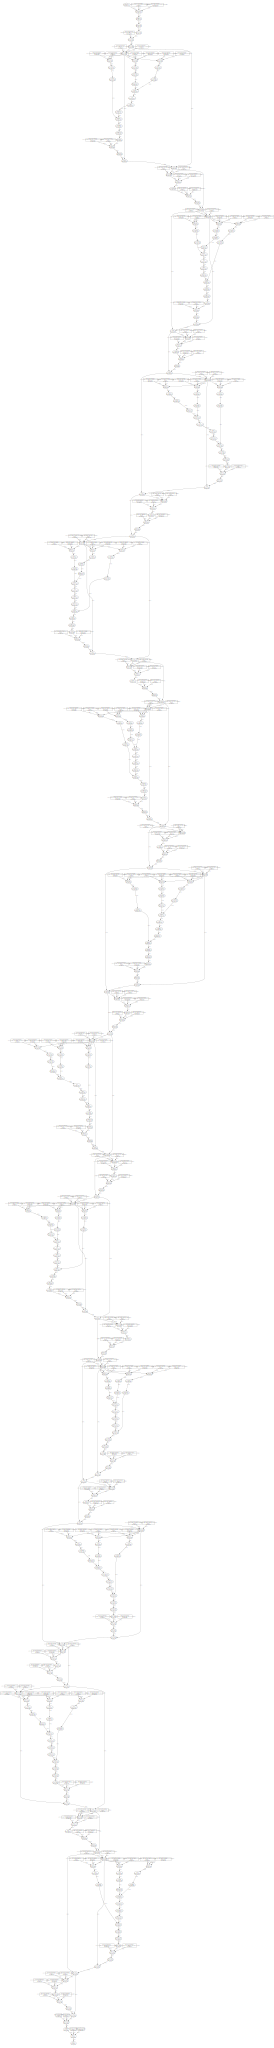

In [6]:
torchtrail.visualize(output, show_modules=False)